In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Set seed for replicability
np.random.seed(123)

In [5]:
# Loading the Auto.csv dataset using pandas
df = pd.read_csv('Auto.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [8]:
# Creating a binary variable using median of 'mpg' variable
median_mpg = df['mpg'].median()
df['mpg_binary'] = np.where(df['mpg'] > median_mpg, 1, 0)

In [9]:
df['cylinders'] = df['cylinders'].astype('category')
df['origin'] = df['origin'].astype('category')

In [10]:
# Performing one-hot encoding
df = pd.get_dummies(df, columns=['cylinders', 'origin'], drop_first=True)

In [11]:
df.head()

,mpg,displacement,horsepower,weight,acceleration,year,name,mpg_binary,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,18.0,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,0,0,0,1,0,0
1,15.0,350.0,165,3693,11.5,70,buick skylark 320,0,0,0,0,1,0,0
2,18.0,318.0,150,3436,11.0,70,plymouth satellite,0,0,0,0,1,0,0
3,16.0,304.0,150,3433,12.0,70,amc rebel sst,0,0,0,0,1,0,0
4,17.0,302.0,140,3449,10.5,70,ford torino,0,0,0,0,1,0,0


In [12]:
# Seperating independent variables and removing 'name' and 'mpg' variables
X = df.drop(['mpg', 'mpg_binary', 'name'], axis=1)
# Seperating dependent variable
y = df['mpg_binary']

In [13]:
# Standardize the data for consistency
scaler = StandardScaler()
X[['displacement','horsepower','weight','acceleration']] = scaler.fit_transform(X[['displacement','horsepower','weight','acceleration']])

In [14]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [15]:
# Store cross-validation errors
crossval_errors = []
# Fitting Support Vector Classifier (SVC) for various 'C' values
for C_val in C_values:
    svc = SVC(C=C_val, kernel='linear')
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    crossval_errors.append(1 - np.mean(scores))

In [16]:
# cross validation errors associated with different 'C' values
for i, C in enumerate(C_values):
    print(f"C = {C} :  Cross-Validation Error = {crossval_errors[i]}")

C = 0.001 :  Cross-Validation Error = 0.2574813372281727
C = 0.01 :  Cross-Validation Error = 0.14514767932489447
C = 0.1 :  Cross-Validation Error = 0.15527426160337554
C = 1 :  Cross-Validation Error = 0.1502434274586173
C = 10 :  Cross-Validation Error = 0.13235962349886388
C = 100 :  Cross-Validation Error = 0.12476468679000341
C = 1000 :  Cross-Validation Error = 0.11973385264524516


In the above results, we can observe how the cross-validation error changes with different values of the regularization parameter 'C'. Lower values of C may lead to underfitting, while higher values may lead to overfitting. So, we need to choose a C that minimizes the cross-validation error. Here, as C increases the cross validation error decreases. The optimal value appears to be around 1 where the error is minimized.

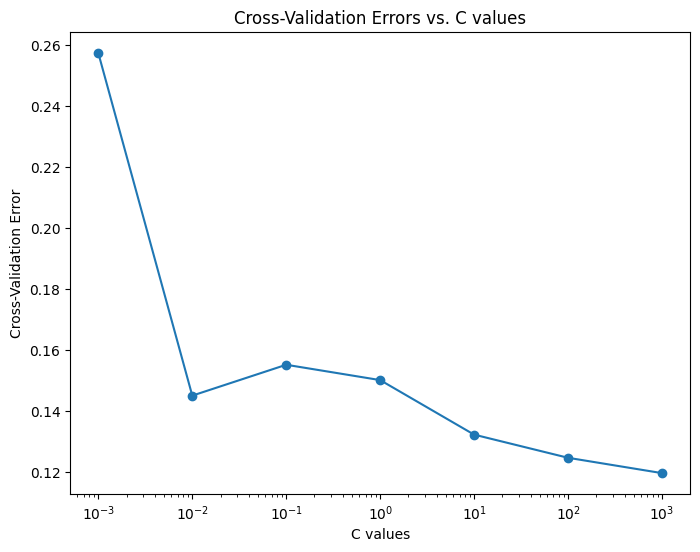

In [17]:
# Report cross-validation errors
plt.figure(figsize=(8, 6))
plt.plot(C_values, crossval_errors, marker='o')
plt.title('Cross-Validation Errors vs. C values')
plt.xlabel('C values')
plt.ylabel('Cross-Validation Error')
plt.xscale('log')
plt.show()

In [18]:
# SVMs with radial and polynomial basis kernels
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]
degree_values = [2, 3, 4]

In [19]:
# Store cross-validation errors for radial basis kernel
cv_errors_rbf = []
for C in C_values:
    for gamma_val in gamma_values:
        svc_rbf = SVC(C=C, kernel='rbf', gamma=gamma_val)
        scores_rbf = cross_val_score(svc_rbf, X, y, cv=5, scoring='accuracy')
        cv_errors_rbf.append(1 - np.mean(scores_rbf))
        print(f"Kernel={'rbf'}, C={C}, Gamma={gamma_val}: cv_errors = {1 - np.mean(scores_rbf)}")

Kernel=rbf, C=0.001, Gamma=0.001: cv_errors = 0.35124959428756897
Kernel=rbf, C=0.001, Gamma=0.01: cv_errors = 0.3486854917234664
Kernel=rbf, C=0.001, Gamma=0.1: cv_errors = 0.3717624148003894
Kernel=rbf, C=0.001, Gamma=1: cv_errors = 0.4307367737747485
Kernel=rbf, C=0.001, Gamma=10: cv_errors = 0.5050957481337228
Kernel=rbf, C=0.001, Gamma=100: cv_errors = 0.4999675430055177
Kernel=rbf, C=0.01, Gamma=0.001: cv_errors = 0.35124959428756897
Kernel=rbf, C=0.01, Gamma=0.01: cv_errors = 0.3486854917234664
Kernel=rbf, C=0.01, Gamma=0.1: cv_errors = 0.3717624148003894
Kernel=rbf, C=0.01, Gamma=1: cv_errors = 0.4307367737747485
Kernel=rbf, C=0.01, Gamma=10: cv_errors = 0.5050957481337228
Kernel=rbf, C=0.01, Gamma=100: cv_errors = 0.4999675430055177
Kernel=rbf, C=0.1, Gamma=0.001: cv_errors = 0.29302174618630317
Kernel=rbf, C=0.1, Gamma=0.01: cv_errors = 0.262317429406037
Kernel=rbf, C=0.1, Gamma=0.1: cv_errors = 0.21139240506329116
Kernel=rbf, C=0.1, Gamma=1: cv_errors = 0.42093476144109054
K

In [20]:
# Store cross-validation errors for polynomial kernel
cv_errors_poly = []

for C in C_values:
    for degree_val in degree_values:
        svc_poly = SVC(C=C, kernel='poly', degree=degree_val)
        scores_poly = cross_val_score(svc_poly, X, y, cv=5, scoring='accuracy')
        cv_errors_poly.append(1 - np.mean(scores_poly))
        print(f"Kernel={'poly'}, C={C}, Degree={degree_val}: cv_errors = {1 - np.mean(scores_poly)}")

Kernel=poly, C=0.001, Degree=2: cv_errors = 0.3358649789029535
Kernel=poly, C=0.001, Degree=3: cv_errors = 0.3256085686465433
Kernel=poly, C=0.001, Degree=4: cv_errors = 0.32304446608244075
Kernel=poly, C=0.01, Degree=2: cv_errors = 0.3358649789029535
Kernel=poly, C=0.01, Degree=3: cv_errors = 0.3256085686465433
Kernel=poly, C=0.01, Degree=4: cv_errors = 0.32304446608244075
Kernel=poly, C=0.1, Degree=2: cv_errors = 0.3358649789029535
Kernel=poly, C=0.1, Degree=3: cv_errors = 0.3053554040895813
Kernel=poly, C=0.1, Degree=4: cv_errors = 0.30279130152547873
Kernel=poly, C=1, Degree=2: cv_errors = 0.2724764686790003
Kernel=poly, C=1, Degree=3: cv_errors = 0.28266796494644597
Kernel=poly, C=1, Degree=4: cv_errors = 0.2749756572541383
Kernel=poly, C=10, Degree=2: cv_errors = 0.17568971113274912
Kernel=poly, C=10, Degree=3: cv_errors = 0.16796494644595905
Kernel=poly, C=10, Degree=4: cv_errors = 0.16543330087633878
Kernel=poly, C=100, Degree=2: cv_errors = 0.15524180460889325
Kernel=poly, C=1

Based on the above results, we can observe that the model performance is greatly influenced by the choice of kernel and associated parameters. Adjusting these hyperparameters to achieve the best possible outcomes is essential.

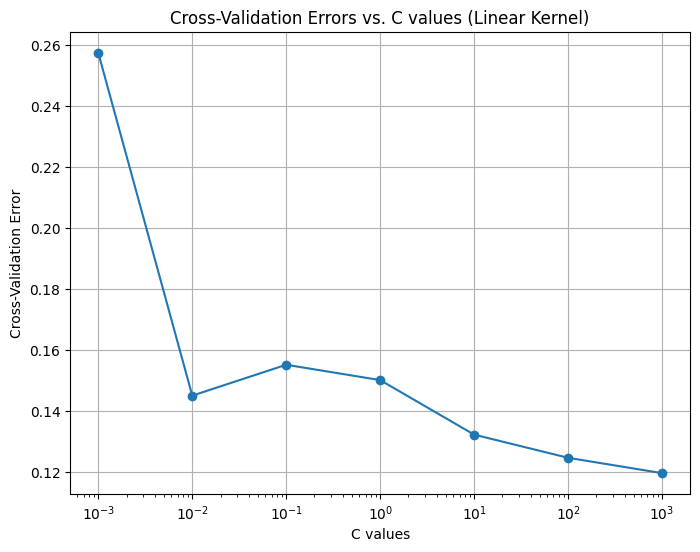

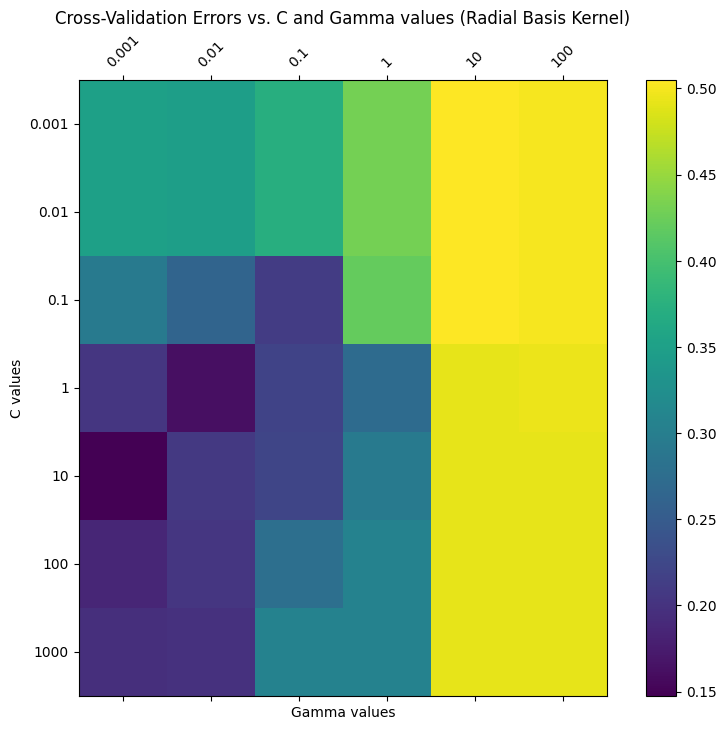

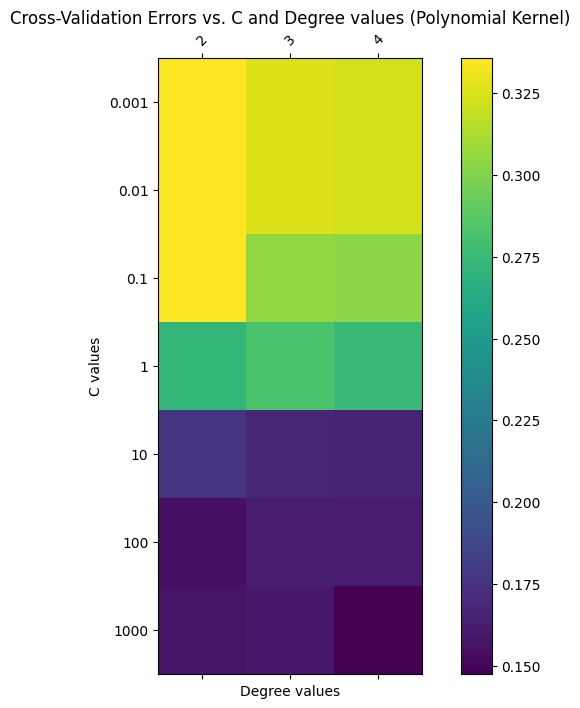

In [22]:
# Plotting Cross-Validation Errors vs. C values for linear kernel
plt.figure(figsize=(8, 6))
plt.plot(C_values, crossval_errors, marker='o')
plt.title('Cross-Validation Errors vs. C values (Linear Kernel)')
plt.xlabel('C values')
plt.ylabel('Cross-Validation Error')
plt.xscale('log')
plt.grid(True)
plt.show()

# Plotting Cross-Validation Errors vs. C and gamma values for radial basis kernel
cv_errors_rbf = np.array(cv_errors_rbf).reshape(len(C_values), len(gamma_values))

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(cv_errors_rbf, cmap='viridis')
fig.colorbar(cax)
plt.xticks(range(len(gamma_values)), gamma_values, rotation=45)
plt.yticks(range(len(C_values)), C_values)
plt.title('Cross-Validation Errors vs. C and Gamma values (Radial Basis Kernel)')
plt.xlabel('Gamma values')
plt.ylabel('C values')
plt.show()

# Plotting Cross-Validation Errors vs. C and degree values for polynomial kernel
cv_errors_poly = np.array(cv_errors_poly).reshape(len(C_values), len(degree_values))

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(cv_errors_poly, cmap='viridis')
fig.colorbar(cax)
plt.xticks(range(len(degree_values)), degree_values, rotation=45)
plt.yticks(range(len(C_values)), C_values)
plt.title('Cross-Validation Errors vs. C and Degree values (Polynomial Kernel)')
plt.xlabel('Degree values')
plt.ylabel('C values')
plt.show()
